A TensorFlow computation is described by a directed graph, which is composed of a set of nodes.

Clients typically construct a computational graph using one of the supported frontend languages (C++ or Python). 

![](img/graph.png)

In a TensorFlow graph, each node has zero or more inputs and zero or more outputs, and represents the instantiation of an operation. 

Values that flow along normal edges in the graph (from outputs to inputs) are <b>tensors</b>.

An <b>operation</b> has a name and represents an abstract computation (e.g., “matrix multiply”, or “add”).

Reference: Abadi, M., Agarwal, A., Barham, P., Brevdo, E., Chen, Z., Citro, C., Corrado, G.S., Davis, A., Dean, J., Devin, M. and Ghemawat, S., 2016. Tensorflow: Large-scale machine learning on heterogeneous distributed systems. arXiv preprint arXiv:1603.04467.

<strong> Logistic Regression Classification with TensorFlow </strong>

In [2]:
import tensorflow as tf

The MNIST data is split into three parts: 55,000 data points of training data (mnist.train), 10,000 points of test data (mnist.test), and 5,000 points of validation data (mnist.validation). 
Each image is 28 pixels by 28 pixels. 

In [1]:
# Import data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
trainX = mnist.train.images
trainY = mnist.train.labels
valX = mnist.validation.images
valY = mnist.validation.labels
testX = mnist.test.images
testY = mnist.test.labels
numFeatures = trainX.shape[1]
numLabels = trainY.shape[1]

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


<b>Implementing the model<b\>

<b>placeholders</b>:
x isn't a specific value. It's a placeholder, a value that we'll input when we ask TensorFlow to run a computation. We want to be able to input any number of MNIST images, each flattened into a 784-dimensional vector. We represent this as a 2-D tensor of floating-point numbers, with a shape [None, 784]. (Here None means that a dimension can be of any length.)

In [3]:
x = tf.placeholder(tf.float32, [None, numFeatures])
y_ = tf.placeholder(tf.float32, [None, numLabels])     

A Variable is a modifiable tensor that lives in TensorFlow's graph of interacting operations. It can be used and even modified by the computation. 

In [4]:
W = tf.Variable(tf.zeros([numFeatures, numLabels]))
b = tf.Variable(tf.zeros([numLabels]))

We can now implement our model. 

In [5]:
y = tf.nn.sigmoid(tf.matmul(x, W) + b)

<b> Training the model </b><br />
we ask TensorFlow to minimize cross_entropy cost using the gradient descent algorithm with a learning rate of 0.5. <br/>
TensorFlow also provides many other <a href="https://www.tensorflow.org/api_guides/python/train#Optimizers">optimization</a> algorithms

In [6]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

In [7]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cost)

Now, we create a tensorflow session:

In [16]:
sess = tf.InteractiveSession()

We first have to create an operation to initialize the variables we created:

In [18]:
tf.global_variables_initializer().run()

Evaluating Our Model

In [19]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [31]:
batch_size = 100
numEpochs=3
avg_cost_val=[]
train_accuracy=[]
val_accuracy = []

In [32]:
for epoch in range(numEpochs):
    print epoch
    avg_cost = 0.
    tr_avg_acc=0.
    total_batch = int(mnist.train.num_examples/batch_size)
    # Loop over all batches
    for _ in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        #sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
        _, c,tr_acc = sess.run([train_step,cost,accuracy], feed_dict={x: batch_xs, y_: batch_ys})
        avg_cost += c / total_batch
        tr_avg_acc += tr_acc/total_batch
    # Display logs per epoch step
    avg_cost_val.append(avg_cost)
    train_accuracy.append(tr_avg_acc)
    val_accuracy.append(sess.run(accuracy, feed_dict={x:valX,y_:valY}))
    print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))

0
('Epoch:', '0001', 'cost=', '1.568502478')
1
('Epoch:', '0002', 'cost=', '1.567633502')
2
('Epoch:', '0003', 'cost=', '1.567089976')


<b> Plotting the cost, training and validation error <b/>

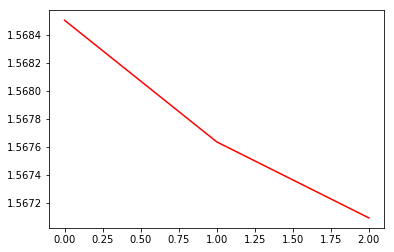

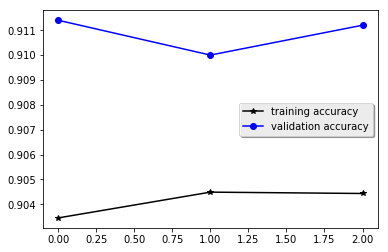

In [33]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(avg_cost_val,'r-',label = 'cost')
plt.figure()
plt.plot(train_accuracy,'k*-')            
plt.plot(val_accuracy,'bo-')
plt.legend(('training accuracy', 'validation accuracy'), shadow=True, fancybox=True)
plt.show()

Accuracy on <b> test data <b/>

In [37]:
print(sess.run(accuracy, feed_dict={x:testX,y_:testY}))

0.9106


Don't forget to close the session

In [ ]:
sess.close()